In [1]:
import numpy as np 
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import scipy
from scipy.stats import norm
import yfinance as yf
warnings.filterwarnings('ignore')

/var/folders/md/06wqv_gd4kx94wr266kr5_br0000gn/T/ipykernel_2525/2051259913.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


Задание по международной диверсификации портфеля
 
Выберите 4 любых фондовых индекса любых рынков – США, Европы, Азии, России, любых других развитых и развивающихся рынков и т.п.

В составе группы рассчитайте попарную корреляцию четырех мировых фондовых индексов и индекса доллара США (DXY Index) за последние как минимум 10 лет. 

Сделайте вывод о том, эффективна ли международная диверсификация в последнее десятилетие. 

Можно ли за счет добавления в портфель индексов других рынков увеличить доходность и снизить риск? 

Влияет ли на динамику индексов индекс доллара США? 

Другие важные макроэкономические показатели?

*Составьте портфель из индексов, включая их в портфель либо в равных долях, либо с присвоением весов на основании коэффициентов корреляции. Рассчитайте доходность и волатильность портфеля.

In [2]:
# Сформируем портфель
#тикеты индексов - обсудить с группой
tickers = ['IMOEX.ME', '^N100', '^GSPC', '^N225', 'DX-Y.NYB']

# Доли в портфеле, 4 индекса 
weights = np.array([0.25, 0.25, 0.25, 0.25]) 

# Размер инвестиций
initial_investment = 1000000

# Загружаем
portfolio_data = yf.download(tickers, start="2013-06-09", end="2023-06-09")['Adj Close']

portfolio_data.index = pd.to_datetime(portfolio_data.index)
#Рассчитываем доходность
returns = portfolio_data.pct_change()

returns.tail()

[*********************100%***********************]  5 of 5 completed


,DX-Y.NYB,IMOEX.ME,^GSPC,^N100,^N225
Date,,,,,
2023-06-02,0.004442,-0.000827,0.014534,0.017308,0.012078
2023-06-05,-0.000192,-0.009318,-0.002004,-0.006572,0.021990
2023-06-06,0.001250,-0.004784,0.002354,0.000641,0.008981
2023-06-07,-0.000288,0.005013,-0.003812,0.000588,-0.018244
2023-06-08,-0.007301,0.005567,0.006189,0.002180,-0.008538


In [4]:
portfolio_data.shape

(2602, 5)

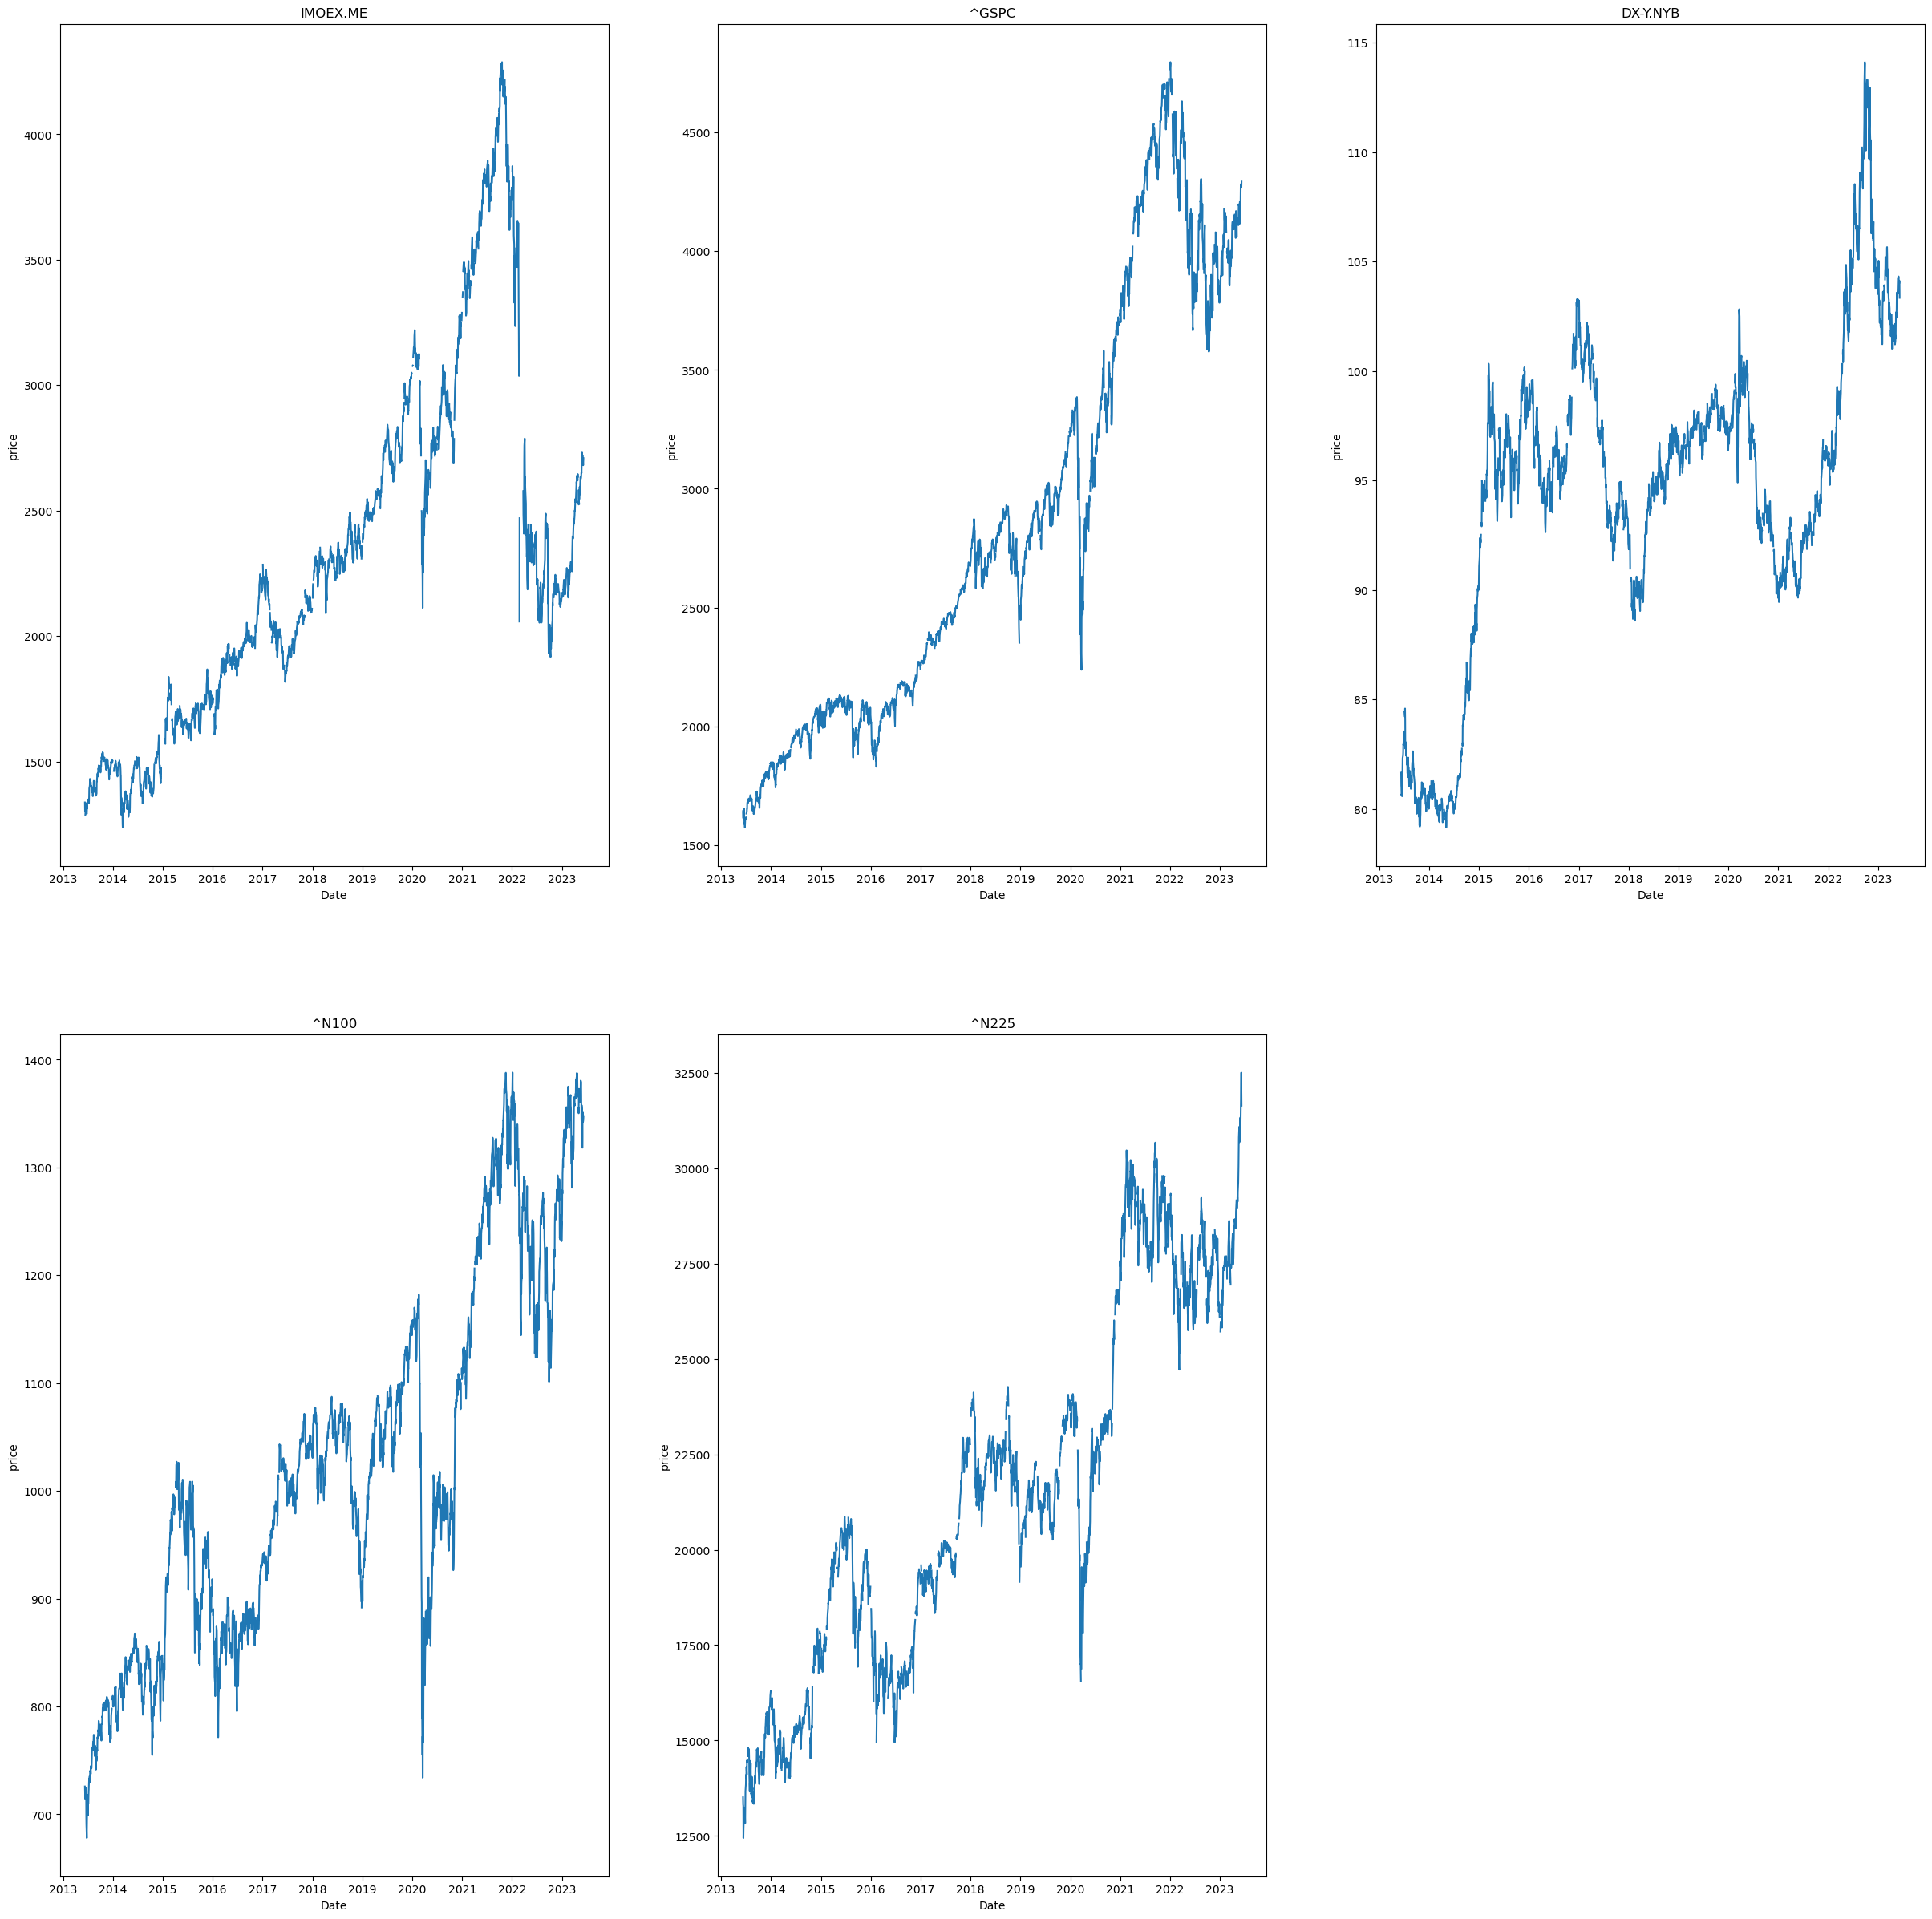

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(30,30))
axs[0, 0].plot(portfolio_data['IMOEX.ME'])
axs[0, 0].set_title('IMOEX.ME')
axs[0, 1].plot(portfolio_data['^GSPC'])
axs[0, 1].set_title('^GSPC')
axs[1, 0].plot(portfolio_data['^N100'])
axs[1, 0].set_title('^N100')
axs[1, 1].plot(portfolio_data['^N225'])
axs[1, 1].set_title('^N225')
axs[0, 2].plot(portfolio_data['DX-Y.NYB'])
axs[0, 2].set_title('DX-Y.NYB')
fig.delaxes(axs[1, 2])
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='price')

In [3]:
corr_spearman_returns = returns.corr(method='spearman')
corr_spearman_returns.head()

,DX-Y.NYB,IMOEX.ME,^GSPC,^N100,^N225
DX-Y.NYB,1.000000,-0.035077,-0.073177,0.025560,0.001675
IMOEX.ME,-0.035077,1.000000,0.261229,0.391799,0.174370
^GSPC,-0.073177,0.261229,1.000000,0.538014,0.150075
^N100,0.025560,0.391799,0.538014,1.000000,0.258786
^N225,0.001675,0.174370,0.150075,0.258786,1.000000


In [4]:
corr_spearman_price = portfolio_data.corr(method='spearman')
corr_spearman_price.head()

,DX-Y.NYB,IMOEX.ME,^GSPC,^N100,^N225
DX-Y.NYB,1.000000,0.255635,0.408447,0.428401,0.358811
IMOEX.ME,0.255635,1.000000,0.889320,0.766913,0.832567
^GSPC,0.408447,0.889320,1.000000,0.926849,0.953392
^N100,0.428401,0.766913,0.926849,1.000000,0.943438
^N225,0.358811,0.832567,0.953392,0.943438,1.000000


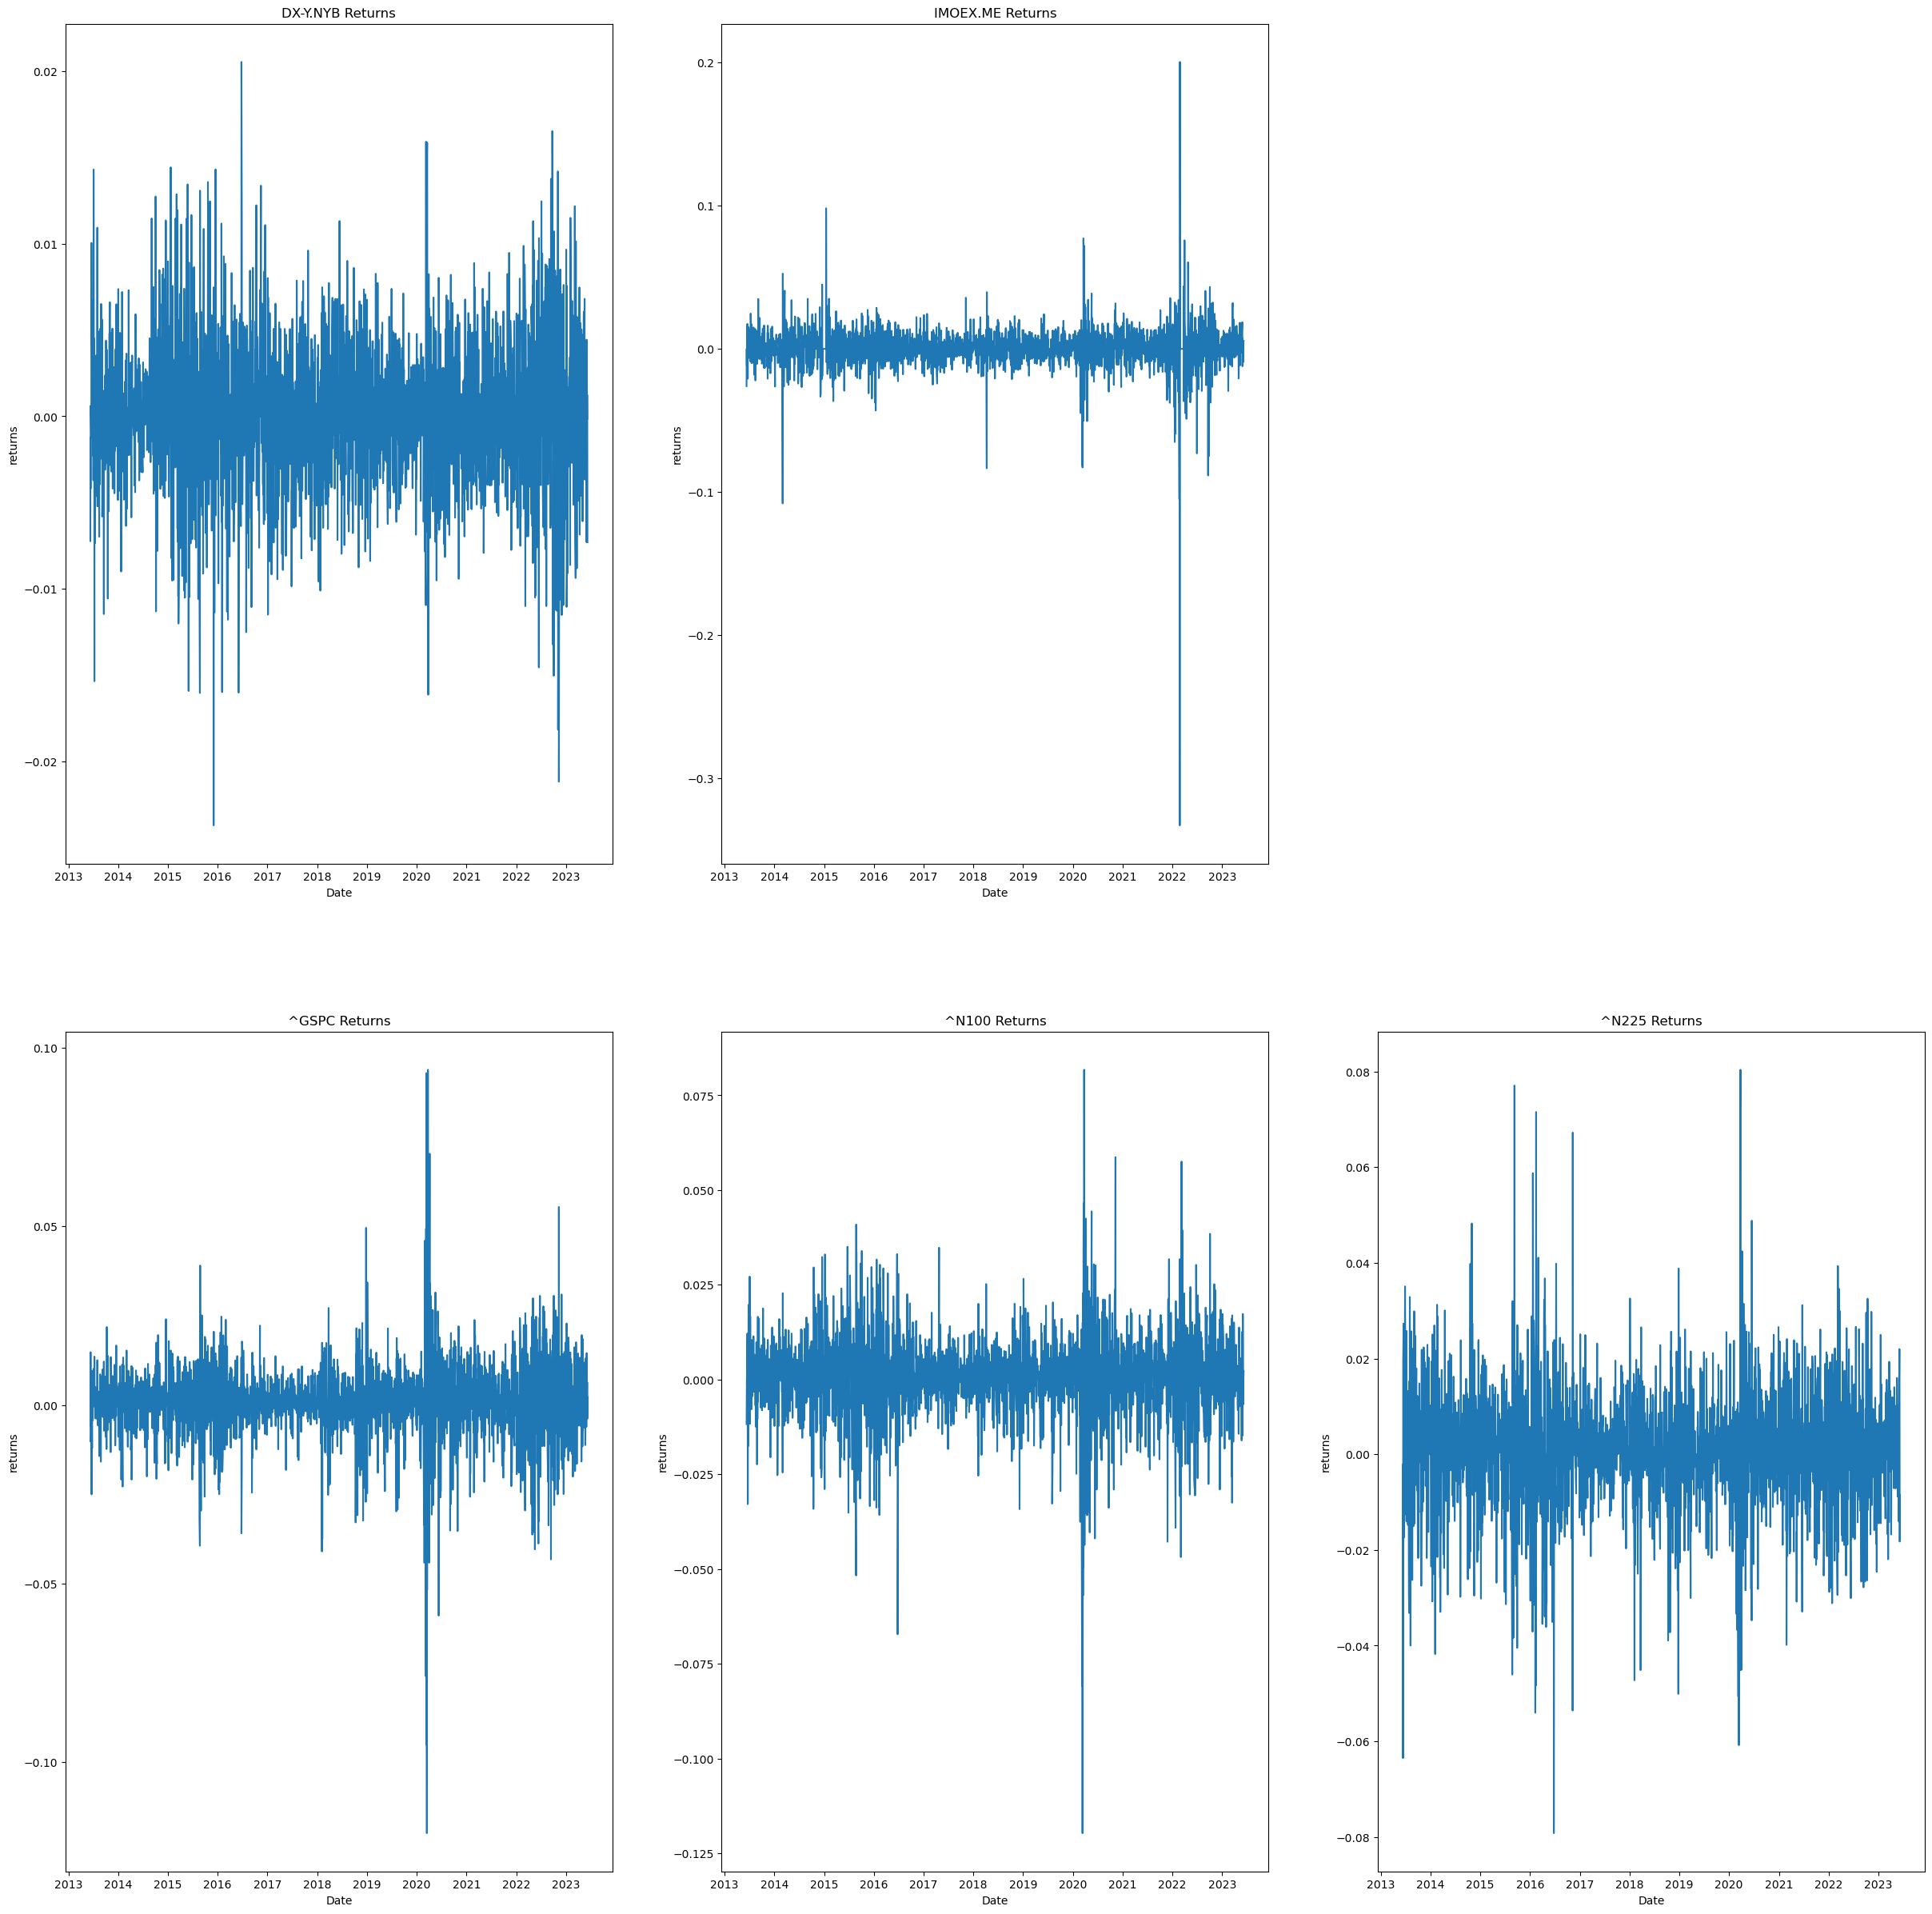

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(30,30))
axs[0, 0].plot(returns['DX-Y.NYB'])
axs[0, 0].set_title('DX-Y.NYB Returns')
axs[0, 1].plot(returns['IMOEX.ME'])
axs[0, 1].set_title('IMOEX.ME Returns')
axs[1, 0].plot(returns['^GSPC'])
axs[1, 0].set_title('^GSPC Returns')
axs[1, 1].plot(returns['^N100'])
axs[1, 1].set_title('^N100 Returns')
axs[1, 2].plot(returns['^N225'])
axs[1, 2].set_title('^N225 Returns')

fig.delaxes(axs[0,2])
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='returns')

In [7]:
#Расчет матрицы ковариации
portfolio_portfolio = portfolio_data
portfolio_portfolio=portfolio_portfolio.drop(columns=['DX-Y.NYB'])
portfolio_returns = portfolio_portfolio.pct_change()
cov_matrix = portfolio_returns.cov()
cov_matrix

,IMOEX.ME,^GSPC,^N100,^N225
IMOEX.ME,0.000217,0.000036,0.000066,0.000031
^GSPC,0.000036,0.000120,0.000072,0.000026
^N100,0.000066,0.000072,0.000123,0.000046
^N225,0.000031,0.000026,0.000046,0.000155


In [8]:
# mean returns
avg_rets = portfolio_returns.mean()

# mean returns для портфеля
port_mean = avg_rets.dot(weights)

# standard deviation портфеля
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# mean инвестиций
mean_investment = (1+port_mean) * initial_investment

# standard deviation инвестиций
stdev_investment = initial_investment * port_stdev

In [9]:
#доверительный интервал
conf_level1 = 0.05
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [10]:
#Считаем VaR
var_1d1 = initial_investment - cutoff1
var_1d1

13683.470008999575

217218.35


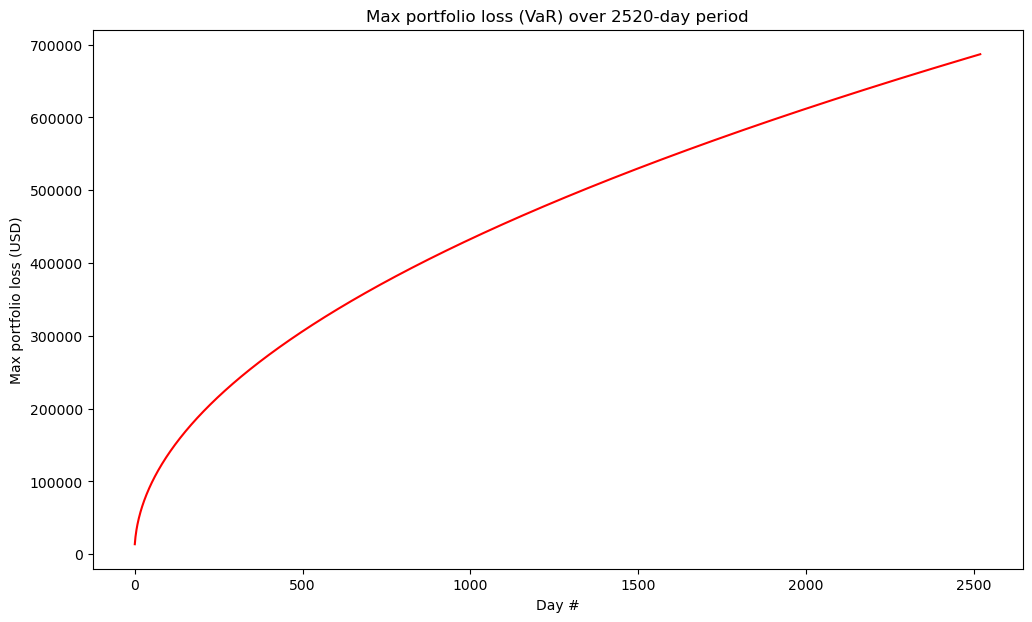

In [11]:
# 252 Day VaR
var_array = []
num_days = int(2520)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    #print(str(x) + " day VaR @ 95% confidence: " + str(np.round(alt_var_1d1_2 * np.sqrt(x),2)))

# график
plt.figure(figsize=(12,7))
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 2520-day period")
plt.plot(var_array, "r")

print(var_array[251])

In [12]:
#'IMOEX.ME', '^N100', '^GSPC', '^N225', 'DX-Y.NYB'

portfolio_volat = portfolio_returns

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

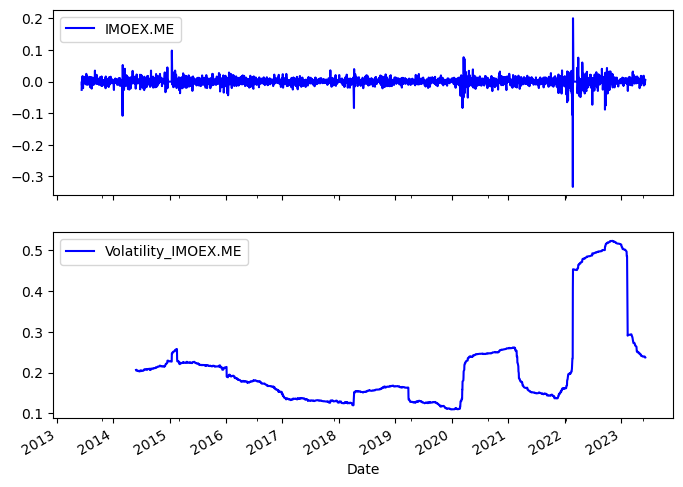

In [13]:
portfolio_volat['Volatility_IMOEX.ME'] = portfolio_volat['IMOEX.ME'].rolling(window=252).std() * np.sqrt(252)

portfolio_volat[['IMOEX.ME', 'Volatility_IMOEX.ME']].plot(subplots=True, color='blue',figsize=(8, 6))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

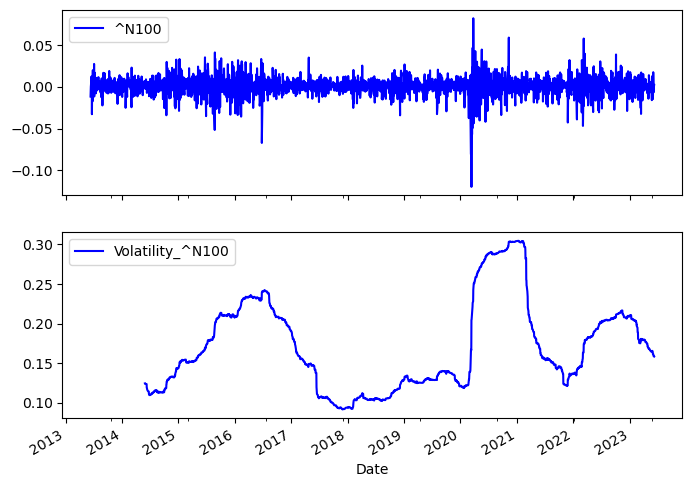

In [14]:
portfolio_volat['Volatility_^N100'] = portfolio_volat['^N100'].rolling(window=252).std() * np.sqrt(252)

portfolio_volat[['^N100', 'Volatility_^N100']].plot(subplots=True, color='blue',figsize=(8, 6))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

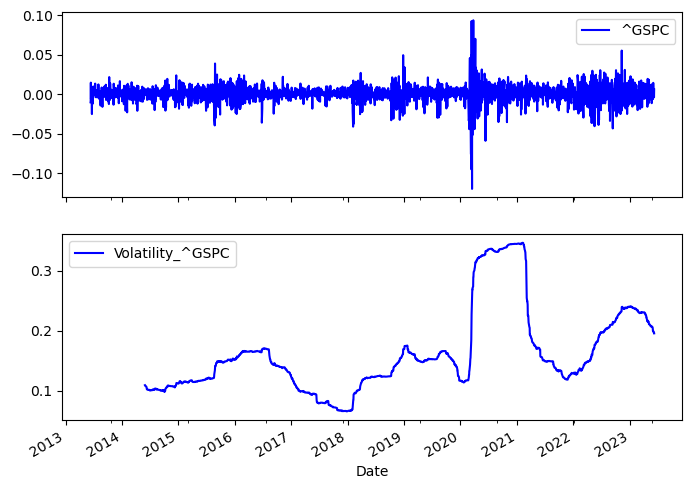

In [15]:
portfolio_volat['Volatility_^GSPC'] = portfolio_volat['^GSPC'].rolling(window=252).std() * np.sqrt(252)

portfolio_volat[['^GSPC', 'Volatility_^GSPC']].plot(subplots=True, color='blue',figsize=(8, 6))

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

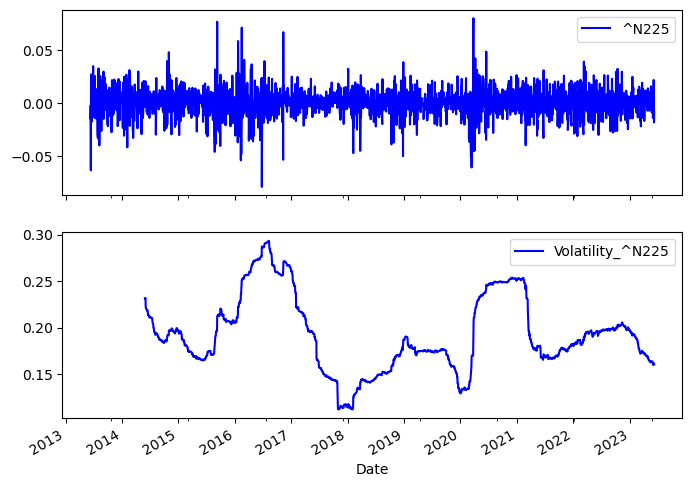

In [16]:
portfolio_volat['Volatility_^N225'] = portfolio_volat['^N225'].rolling(window=252).std() * np.sqrt(252)

portfolio_volat[['^N225', 'Volatility_^N225']].plot(subplots=True, color='blue',figsize=(8, 6))

In [17]:
portfolio_volat['Volatility_^N225'].sum()

452.67167449214946

In [18]:
#stdev(close price) for risk 
#по новой

In [19]:
portfolio_optimization = portfolio_data
portfolio_optimization=portfolio_optimization.drop(columns=['DX-Y.NYB'])

In [20]:
# number of simulation
n = 50000
# n = 10

port_weights = np.zeros(shape=(n,len(portfolio_optimization.columns)))
port_volatility = np.zeros(n)
port_sr = np.zeros(n)
port_return = np.zeros(n)

num_securities = len(portfolio_optimization.columns)
# num_securities
for i in range(n):
    # Weight each security
    weights = np.random.random(4)
    # normalize it, so that some is one
    weights /= np.sum(weights)
    port_weights[i,:] = weights 
    #     print(f'Normalized Weights : {weights.flatten()}')

    # Expected return (weighted sum of mean returns). Mult by 252 as we always do annual calculation and year has 252 business days
    log_ret = np.log(portfolio_optimization / portfolio_optimization.shift(1))
    exp_ret = log_ret.mean().dot(weights)*2520 
    port_return[i] = exp_ret
#     print(f'\nExpected return is : {exp_ret[0]}')

    # Exp Volatility (Risk)
    exp_vol = np.sqrt(weights.T.dot(2520*log_ret.cov().dot(weights)))
    port_volatility[i] = exp_vol
#     print(f'\nVolatility : {exp_vol[0][0]}')

    # Sharpe ratio
    sr = exp_ret / exp_vol
    port_sr[i] = sr
#     print(f'\nSharpe ratio : {sr[0][0]}')

In [21]:
# Index of max Sharpe Ratio
max_sr = port_sr.max()
ind = port_sr.argmax()
# Return and Volatility at Max SR
max_sr_ret = port_return[ind]
max_sr_vol = port_volatility[ind]

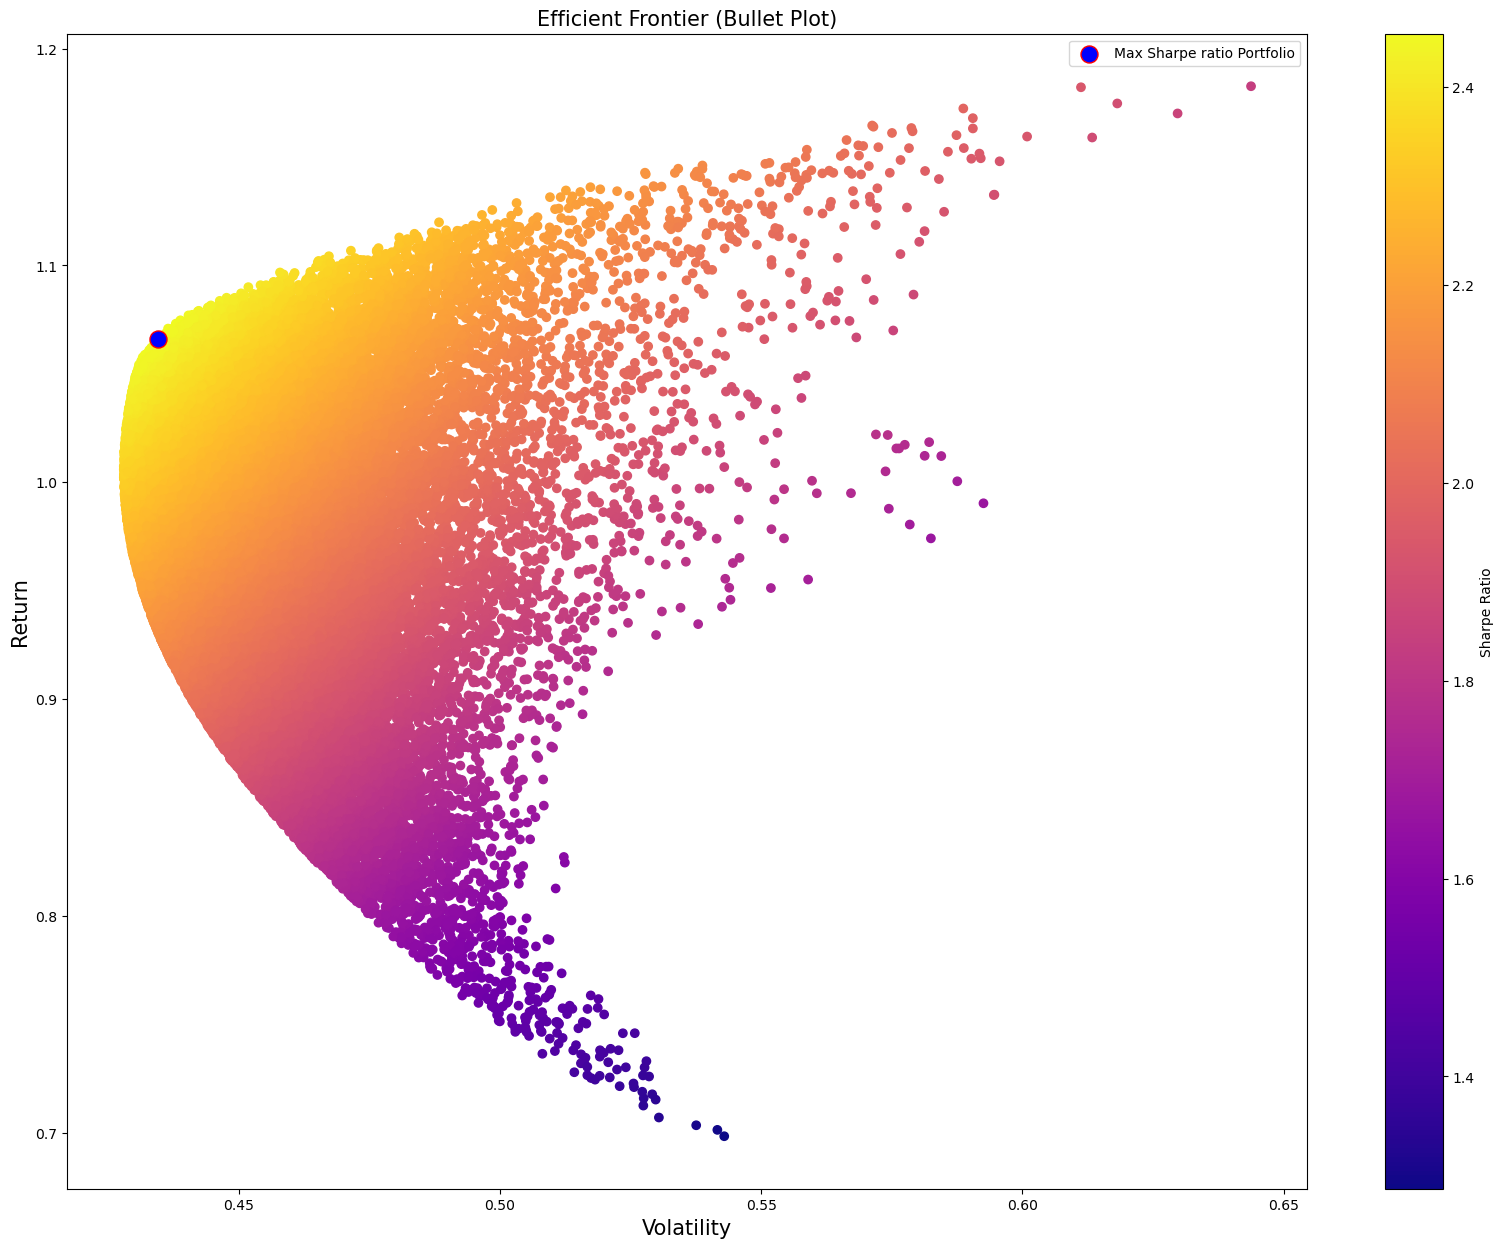

In [22]:
plt.figure(figsize=(20,15))
plt.scatter(port_volatility,port_return,c=port_sr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.title('Efficient Frontier (Bullet Plot)', fontsize=15)
plt.scatter(max_sr_vol, max_sr_ret, c='blue', s=150, edgecolors='red', marker='o', label='Max \
Sharpe ratio Portfolio')
plt.legend();

In [23]:
stocks = ['IMOEX.ME', '^GSPC', '^N100', '^N225']
for weight, stock in zip(port_weights[ind],stocks):
    print(f'{round(weight * 100, 2)} % of {stock}')
    
# best portfolio return
print(f'\nMarkowitz optimal portfolio return is : {round(max_sr_ret * 100, 2)}% with volatility \
{max_sr_vol}')

34.36 % of IMOEX.ME
37.04 % of ^GSPC
0.07 % of ^N100
28.52 % of ^N225

Markowitz optimal portfolio return is : 106.63% with volatility 0.43459293701099594


In [24]:
max_sr

2.45349819406093

In [25]:
portfolio_optimization.head()

,IMOEX.ME,^GSPC,^N100,^N225
Date,,,,
2013-06-10,1337.790039,1642.810059,725.880005,13514.200195
2013-06-11,1302.939941,1626.130005,717.340027,13317.620117
2013-06-12,NaN,1612.520020,714.289978,13289.320312
2013-06-13,1287.510010,1636.359985,714.330017,12445.379883
2013-06-14,1300.800049,1626.729980,716.010010,12686.519531


In [32]:
port_weights1 = np.array([0, 1, 0, 0]) 

# Expected return (weighted sum of mean returns). Mult by 2520 as we always do annual calculation and year has 252 business days
log_ret1 = np.log(portfolio_optimization / portfolio_optimization.shift(1))
exp_ret1 = log_ret1.mean().dot(port_weights1)*2520 
port_return1 = exp_ret1
print(f'\nExpected return is : {exp_ret1 * 100}')

    # Exp Volatility (Risk)
exp_vol1 = np.sqrt(port_weights1.T.dot(2520*log_ret1.cov().dot(port_weights1)))
port_volatility1 = exp_vol1
print(f'\nVolatility : {exp_vol1}')

    # Sharpe ratio
sr1 = exp_ret1 / exp_vol1
print(f'\Sharp Ratio : {sr1}')


Expected return is : 98.0785741711536

Volatility : 0.5633489981350522
\Sharp Ratio : 1.740991365846738


Оптимальный портфель:

34.36 % of IMOEX.ME
37.04 % of ^GSPC
0.07 % of ^N100
28.52 % of ^N225

Markowitz optimal portfolio return is : 106.63% with volatility 0.43459293701099594

Шарп: 2.45349819406093

Мосбиржа:

Expected return is : 120.3153508323845

Volatility : 0.6654225827149868

\Sharp Ratio : 1.8081044130105495

SnP:
Expected return is : 98.0785741711536

Volatility : 0.5633489981350522

\Sharp Ratio : 1.740991365846738

Н100:
Expected return is : 66.13666271392583

Volatility : 0.5643623121016859

\Sharp Ratio : 1.1718830491645134

Н225:
Expected return is : 101.33850970786816

Volatility : 0.634630917311347

\Sharp Ratio : 1.5968101607339742

In [53]:
# Сформируем портфель2
#тикеты индексов - обсудить с группой
tickers2 = ['IMOEX.ME', '^N100', '^GSPC', '^N225', '^BVSP']

# Доли в портфеле, 4 индекса 
weights2 = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) 

# Размер инвестиций
initial_investment2 = 1000000

# Загружаем
portfolio_data2 = yf.download(tickers2, start="2013-06-09", end="2023-06-09")['Adj Close']

portfolio_data2.index = pd.to_datetime(portfolio_data.index)
#Рассчитываем доходность
returns2 = portfolio_data2.pct_change()

portfolio_data2.tail()

[*********************100%***********************]  5 of 5 completed


,IMOEX.ME,^BVSP,^GSPC,^N100,^N225
Date,,,,,
2023-06-02,2719.479980,112558.0,4282.370117,1351.290039,31524.220703
2023-06-05,2694.139893,112696.0,4273.790039,1342.410034,32217.429688
2023-06-06,2681.250000,114610.0,4283.850098,1343.270020,32506.779297
2023-06-07,2694.689941,115488.0,4267.520020,1344.060059,31913.740234
2023-06-08,2709.689941,NaN,4293.930176,1346.989990,31641.269531


In [54]:
port_weights2 = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) 

# Expected return (weighted sum of mean returns). Mult by 2520 as we always do annual calculation and year has 252 business days
log_ret2 = np.log(portfolio_data2 / portfolio_data2.shift(1))
exp_ret2 = log_ret2.mean().dot(port_weights2)*2520 
port_return2 = exp_ret2
print(f'\nExpected return is : {exp_ret1 * 100}')

    # Exp Volatility (Risk)
exp_vol2 = np.sqrt(port_weights2.T.dot(2520*log_ret2.cov().dot(port_weights2)))
port_volatility2 = exp_vol2
print(f'\nVolatility : {exp_vol2}')

    # Sharpe ratio
sr2 = exp_ret2 / exp_vol2
print(f'\nSharp Ratio : {sr2}')


Expected return is : 98.0785741711536

Volatility : 0.44763665825193527

Sharp Ratio : 2.077214761587505


In [56]:
# number of simulation
n = 50000
# n = 10

port_weights = np.zeros(shape=(n,len(portfolio_data2.columns)))
port_volatility = np.zeros(n)
port_sr = np.zeros(n)
port_return = np.zeros(n)

num_securities = len(portfolio_data2.columns)
# num_securities
for i in range(n):
    # Weight each security
    weights = np.random.random(5)
    # normalize it, so that some is one
    weights /= np.sum(weights)
    port_weights[i,:] = weights 
    #     print(f'Normalized Weights : {weights.flatten()}')

    # Expected return (weighted sum of mean returns). Mult by 252 as we always do annual calculation and year has 252 business days
    log_ret = np.log(portfolio_data2 / portfolio_data2.shift(1))
    exp_ret = log_ret.mean().dot(weights)*2520 
    port_return[i] = exp_ret
#     print(f'\nExpected return is : {exp_ret[0]}')

    # Exp Volatility (Risk)
    exp_vol = np.sqrt(weights.T.dot(2520*log_ret.cov().dot(weights)))
    port_volatility[i] = exp_vol
#     print(f'\nVolatility : {exp_vol[0][0]}')

    # Sharpe ratio
    sr = exp_ret / exp_vol
    port_sr[i] = sr
#     print(f'\nSharpe ratio : {sr[0][0]}')

# Index of max Sharpe Ratio
max_sr = port_sr.max()
ind = port_sr.argmax()
# Return and Volatility at Max SR
max_sr_ret = port_return[ind]
max_sr_vol = port_volatility[ind]

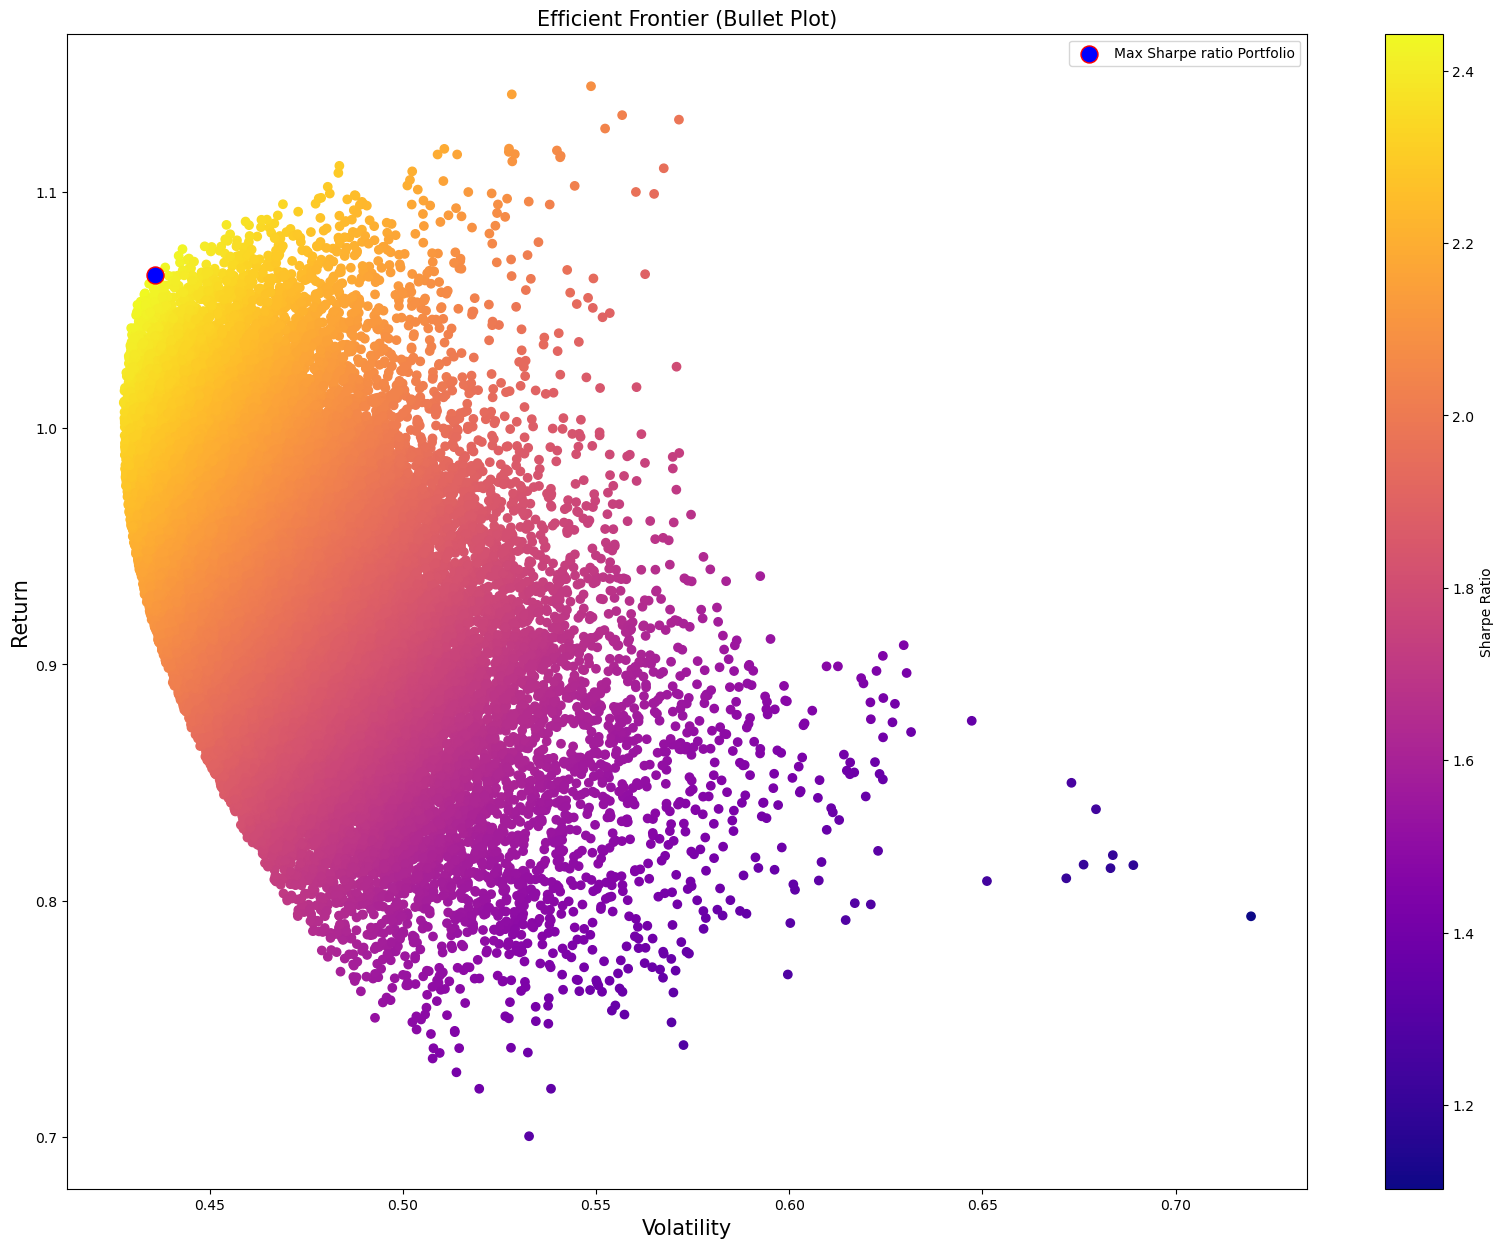

In [57]:
plt.figure(figsize=(20,15))
plt.scatter(port_volatility,port_return,c=port_sr, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.title('Efficient Frontier (Bullet Plot)', fontsize=15)
plt.scatter(max_sr_vol, max_sr_ret, c='blue', s=150, edgecolors='red', marker='o', label='Max \
Sharpe ratio Portfolio')
plt.legend();

In [58]:
stocks = ['IMOEX.ME','^BVSP','^GSPC' ,'^N100', '^N225']
for weight, stock in zip(port_weights[ind],stocks):
    print(f'{round(weight * 100, 2)} % of {stock}')
    
# best portfolio return
print(f'\nMarkowitz optimal portfolio return is : {round(max_sr_ret * 100, 2)}% with volatility \
{max_sr_vol}')

print("Sharpe", max_sr)

35.79 % of IMOEX.ME
0.81 % of ^BVSP
33.39 % of ^GSPC
1.14 % of ^N100
28.87 % of ^N225

Markowitz optimal portfolio return is : 106.46% with volatility 0.4357983086332538
Sharpe 2.442851974559567


Сбалансированные с Бразилией:

Expected return is : 98.0785741711536

Volatility : 0.44763665825193527

Sharp Ratio : 2.077214761587505

Бразильцы оптимизированные: 
Markowitz optimal portfolio return is : 106.94% with volatility 0.43705967109532123

Sharpe 2.4468381295500508

Китайцы сбалансированные:
Expected return is : 98.0785741711536

Volatility : 0.4018625006041388

Sharp Ratio : 2.0584529761236334

Китайцы оптимальные:
0.07 % of 000001.SS
35.73 % of IMOEX.ME
36.24 % of ^GSPC
0.14 % of ^N100
27.82 % of ^N225

Markowitz optimal portfolio return is : 106.84% with volatility 0.43583172850476803
Sharpe 2.451377931087038

In [52]:
portfolio_data2

,000001.SS,IMOEX.ME,^GSPC,^N100,^N225
Date,,,,,
2013-06-10,NaN,1337.790039,1642.810059,725.880005,13514.200195
2013-06-11,NaN,1302.939941,1626.130005,717.340027,13317.620117
2013-06-12,NaN,NaN,1612.520020,714.289978,13289.320312
2013-06-13,2148.354980,1287.510010,1636.359985,714.330017,12445.379883
2013-06-14,2162.041016,1300.800049,1626.729980,716.010010,12686.519531
...,...,...,...,...,...
2023-06-02,3230.070068,2719.479980,4282.370117,1351.290039,31524.220703
2023-06-05,3232.439941,2694.139893,4273.790039,1342.410034,32217.429688
2023-06-06,3195.340088,2681.250000,4283.850098,1343.270020,32506.779297
